Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [378]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [379]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Numbers recognition - dataset **MNIST**

Download dataset

In [380]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [381]:
data = np.concatenate([train_data, test_data])

In [382]:
data.shape

(70000, 28, 28)

In [383]:
label = np.concatenate([train_labels,test_labels])

In [384]:
label.shape

(70000,)

Informations about dataset

In [385]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [386]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [387]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [388]:
train_labels[0]

5

One-hot encoding

In [389]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [390]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [391]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [392]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Visulization

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


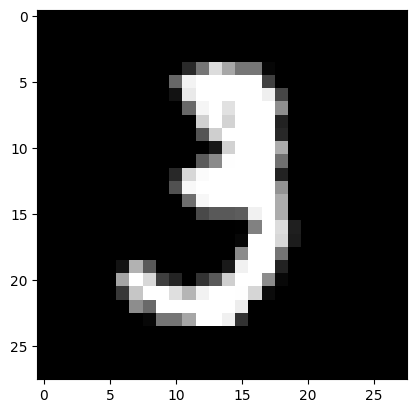

In [393]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [394]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [395]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               100480    
                                                                 
 dense_65 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [396]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 5.2247 - accuracy: 0.8603 - val_loss: 1.4387 - val_accuracy: 0.9095
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.8840 - accuracy: 0.9200 - val_loss: 0.8063 - val_accuracy: 0.9217
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.9341 - val_loss: 0.5938 - val_accuracy: 0.9298
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3003 - accuracy: 0.9468 - val_loss: 0.4830 - val_accuracy: 0.9398
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2140 - accuracy: 0.9566 - val_loss: 0.4798 - val_accuracy: 0.9397
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1773 - accuracy: 0.9601 - val_loss: 0.4710 - val_accuracy: 0.9402
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1591 - accuracy: 0.9644 - val_loss: 0.4241 - val_accuracy: 0.9413
Epoch 

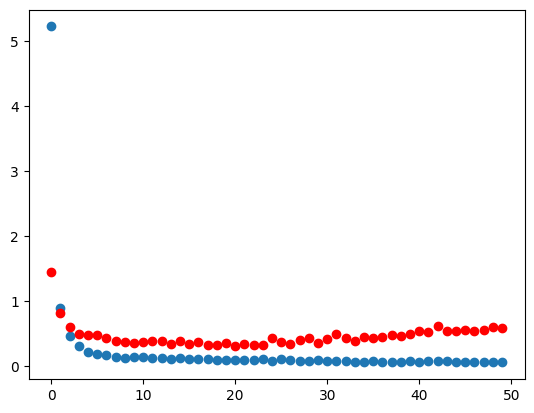

In [397]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

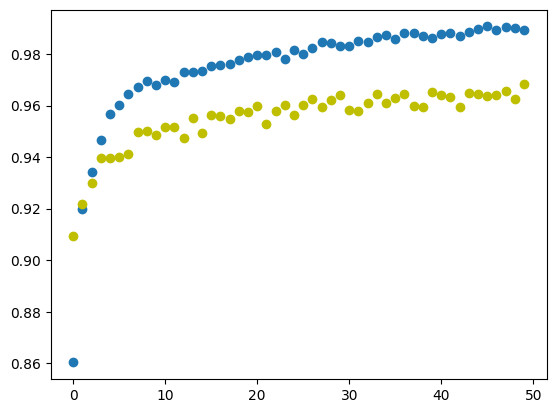

In [398]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [399]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6038411259651184
Test accuracy: 0.96670001745224


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 41ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 2.1509282e-23, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.6604197e-13]], dtype=float32)

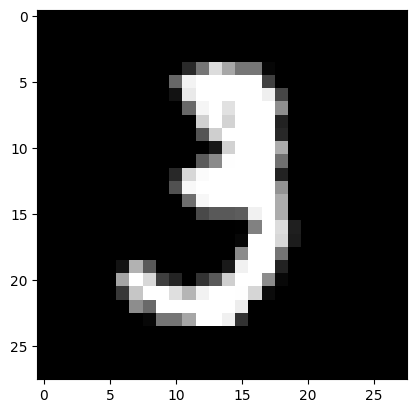

In [400]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [401]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [402]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Numbers recognition - dataset **MNIST**

Download dataset

In [403]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [404]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [405]:
data = np.concatenate([train_data, test_data])

In [406]:
data.shape

(70000, 28, 28)

In [407]:
label = np.concatenate([train_labels,test_labels])

In [408]:
label.shape

(70000,)

Informations about dataset

In [409]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [410]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [411]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [412]:
train_labels[0]

5

One-hot encoding

In [413]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [414]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [415]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [416]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


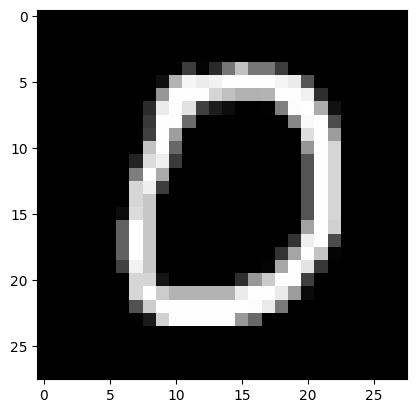

In [417]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [418]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [419]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               100480    
                                                                 
 dense_67 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [420]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 4.8830 - accuracy: 0.8645 - val_loss: 1.3964 - val_accuracy: 0.9002
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.7926 - accuracy: 0.9101 - val_loss: 0.6780 - val_accuracy: 0.9047
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.9264 - val_loss: 0.4988 - val_accuracy: 0.9209
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2642 - accuracy: 0.9422 - val_loss: 0.4633 - val_accuracy: 0.9288
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2061 - accuracy: 0.9518 - val_loss: 0.3954 - val_accuracy: 0.9326
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1641 - accuracy: 0.9595 - val_loss: 0.3863 - val_accuracy: 0.9377
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1414 - accuracy: 0.9645 - val_loss: 0.3936 - val_accuracy: 0.9433
Epoch 

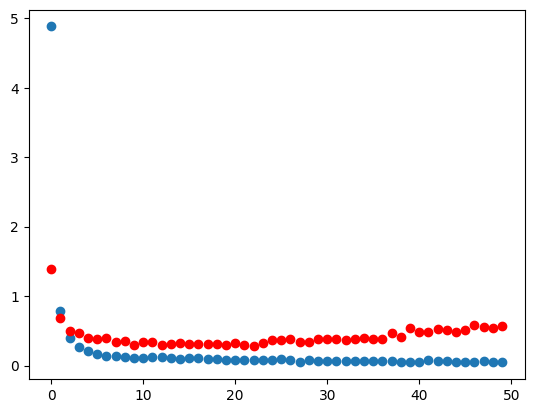

In [421]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

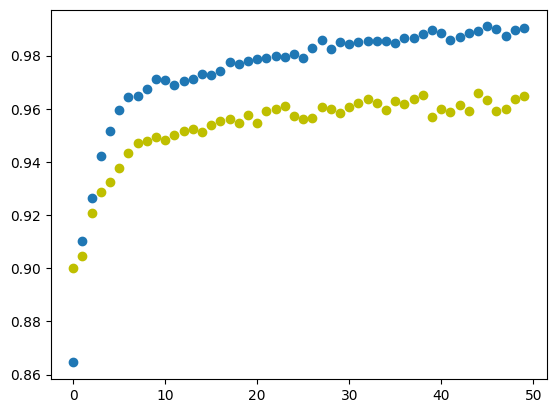

In [422]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [423]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.506654679775238
Test accuracy: 0.9695000052452087


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 45ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

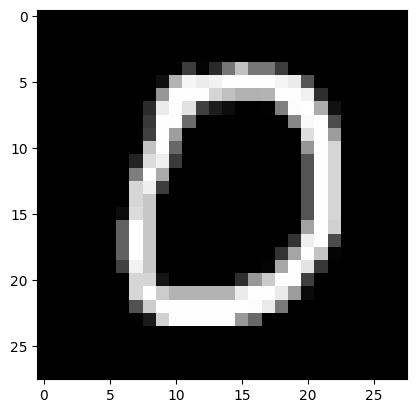

In [424]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

# **Regularyzacja** - metoda 1

Zwiększamy zbiór treningowy z **60000** do **65000** (20% to zbiór walidacyjny)

In [425]:
test_data = data[:65000]
train_data = data[65000:]
test_labels = label[:65000]
train_labels = label[65000:]

In [426]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(65000, 28, 28) (5000, 28, 28) (65000,) (5000,)


One-hot coding

In [427]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [428]:
train_data.shape,train_labels.shape

((5000, 28, 28), (5000, 10))

In [429]:
test_data.shape,test_labels.shape

((65000, 28, 28), (65000, 10))

In [430]:
train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Visulization

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


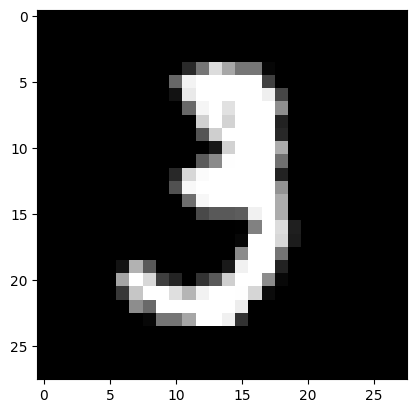

In [431]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [432]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [433]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               100480    
                                                                 
 dense_69 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [434]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 1s 8ms/step - loss: 27.2823 - accuracy: 0.6733 - val_loss: 9.7471 - val_accuracy: 0.8230
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 2.9699 - accuracy: 0.9147 - val_loss: 7.7618 - val_accuracy: 0.8540
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 1.3477 - accuracy: 0.9495 - val_loss: 6.5886 - val_accuracy: 0.8710
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.9678 - val_loss: 6.6559 - val_accuracy: 0.8660
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3883 - accuracy: 0.9790 - val_loss: 5.9981 - val_accuracy: 0.8770
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9847 - val_loss: 6.3686 - val_accuracy: 0.8790
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9893 - val_loss: 6.7112 - val_accuracy: 0.8800
Epoch 8/50
32/32 [=

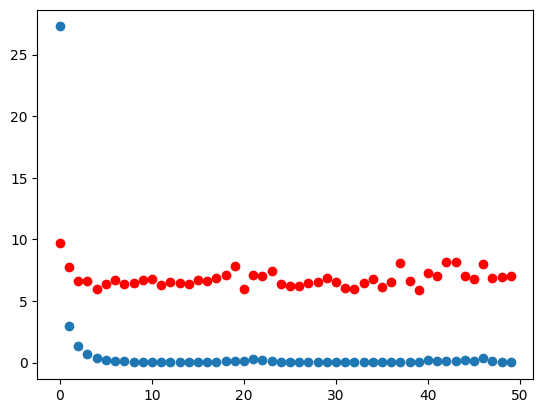

In [435]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

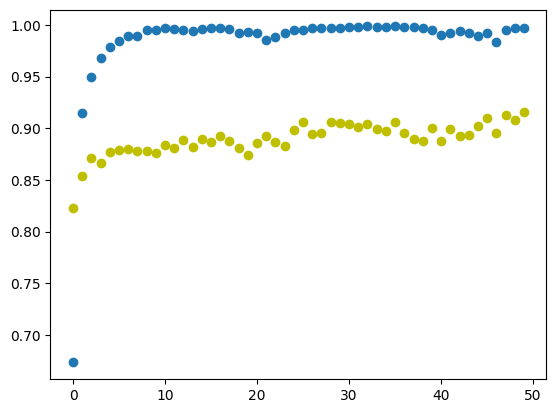

In [436]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [437]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 8.388226509094238
Test accuracy: 0.883384644985199


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 34ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

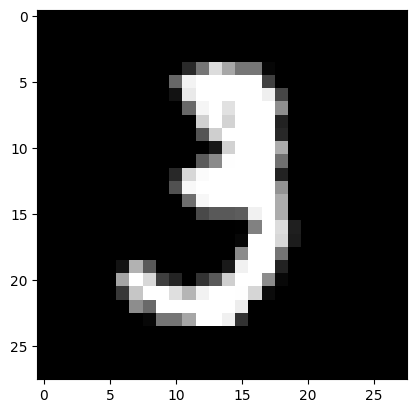

In [438]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)



In [439]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [440]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [441]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [442]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [443]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [444]:
train_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

Visulization

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


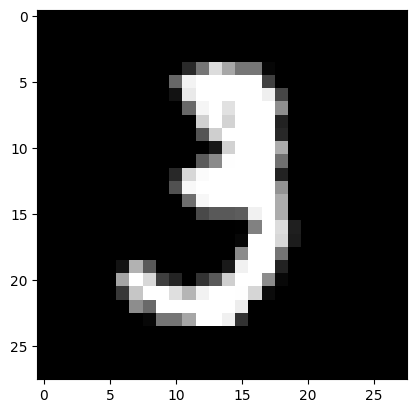

In [445]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [446]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [447]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 128)               100480    
                                                                 
 dense_71 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [448]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 15ms/step - loss: 57.5500 - accuracy: 0.4437 - val_loss: 26.3772 - val_accuracy: 0.6150
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 7.1247 - accuracy: 0.8487 - val_loss: 19.3521 - val_accuracy: 0.6950
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 2.8438 - accuracy: 0.9237 - val_loss: 18.1339 - val_accuracy: 0.7325
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 1.0286 - accuracy: 0.9681 - val_loss: 14.8389 - val_accuracy: 0.7675
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5399 - accuracy: 0.9781 - val_loss: 14.9895 - val_accuracy: 0.7700
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.9869 - val_loss: 13.9272 - val_accuracy: 0.7600
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1188 - accuracy: 0.9919 - val_loss: 14.4867 - val_accuracy: 0.7650
Epoch 8/50


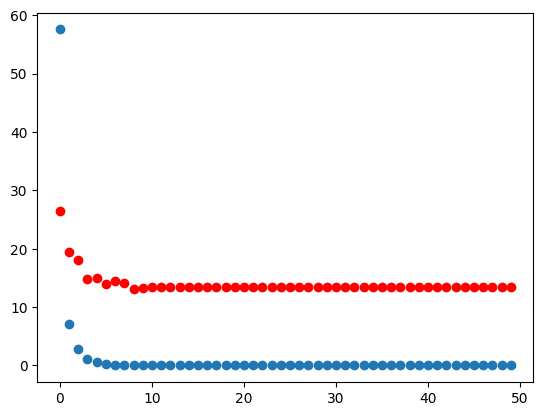

In [449]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

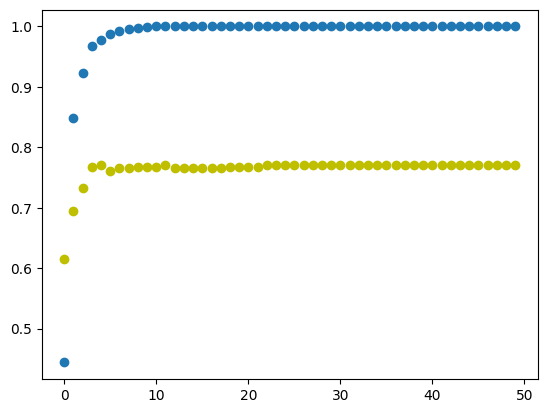

In [450]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [451]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 10.958120346069336
Test accuracy: 0.8068529367446899


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 38ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

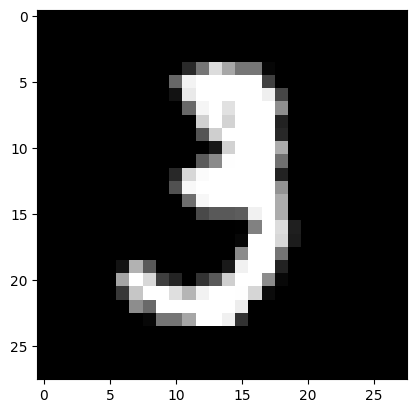

In [452]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zwiększony zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

In [453]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 128)               100480    
                                                                 
 dense_71 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 4 epoki, potem praktycznie się nie uczy, wykres błędu (treningowego i walidacyjnego) jest praktycznie na stałym poziomie.

--------------------------------------------------------------------------------------------------

In [454]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

One-hot encoding

In [455]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [456]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [457]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [458]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# **Regularyzacja** - metoda 2

Zmniejszamy **wielkość modelu**:

In [459]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [460]:
model = Sequential()
model.add(Dense(units = 64, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                50240     
                                                                 
 dense_73 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [461]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 6.5098 - accuracy: 0.8163 - val_loss: 1.1423 - val_accuracy: 0.8436
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.8722 - accuracy: 0.8537 - val_loss: 0.6737 - val_accuracy: 0.8676
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.8797 - val_loss: 0.5495 - val_accuracy: 0.8873
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.9025 - val_loss: 0.4751 - val_accuracy: 0.8999
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.9149 - val_loss: 0.4472 - val_accuracy: 0.9097
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2932 - accuracy: 0.9248 - val_loss: 0.3957 - val_accuracy: 0.9166
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2610 - accuracy: 0.9320 - val_loss: 0.3753 - val_accuracy: 0.9242
Epoch 

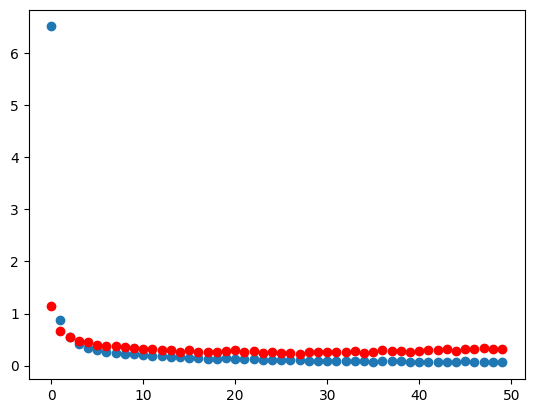

In [462]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

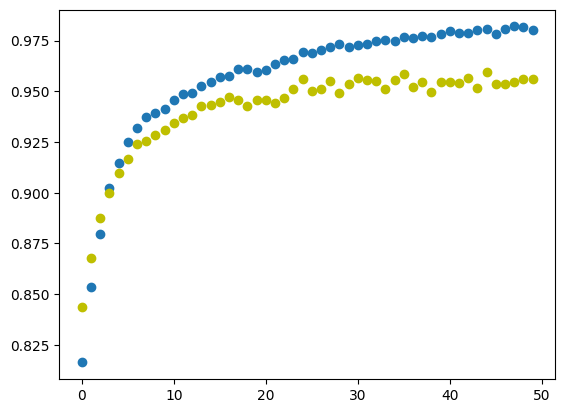

In [463]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [464]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3401225507259369
Test accuracy: 0.9570000171661377


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 53ms/step


array([[1.0000000e+00, 0.0000000e+00, 2.7850517e-09, 3.2065512e-29,
        8.2517981e-16, 9.5437488e-22, 5.3893983e-21, 5.8958713e-18,
        1.5102388e-26, 2.4283206e-14]], dtype=float32)

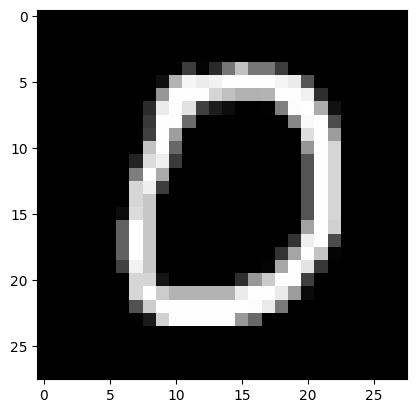

In [465]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zbiór treningowy  **60000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

In [466]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                50240     
                                                                 
 dense_73 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz


Model uczy się, mniewięcej do 35 epoki, poźniej następuje lekkie niewielkie przeuczeniem wykresy błędu (treningowego i walidacyjnego) się obijają

# **Regularyzacja** - metoda 3

Import normy L2:

In [467]:
from keras.regularizers import l2


Danie regularyzacji L2 do warstw:

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


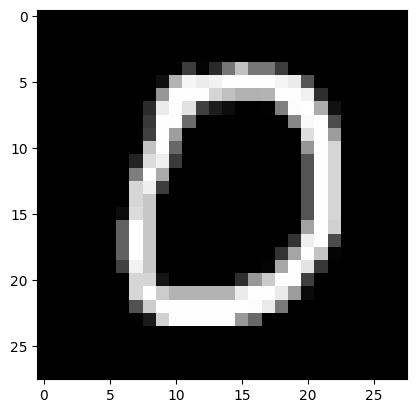

In [468]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [469]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [470]:
model = Sequential()
model.add(Dense(units = 128,kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10,kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 128)               100480    
                                                                 
 dense_75 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [471]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 6.4046 - accuracy: 0.8535 - val_loss: 2.4691 - val_accuracy: 0.8813
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 1.9558 - accuracy: 0.8994 - val_loss: 1.7521 - val_accuracy: 0.9111
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 1.4619 - accuracy: 0.9261 - val_loss: 1.4728 - val_accuracy: 0.9184
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 1.1778 - accuracy: 0.9413 - val_loss: 1.2201 - val_accuracy: 0.9327
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.9791 - accuracy: 0.9485 - val_loss: 1.0248 - val_accuracy: 0.9356
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.8051 - accuracy: 0.9548 - val_loss: 0.8536 - val_accuracy: 0.9435
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.6823 - accuracy: 0.9570 - val_loss: 0.7596 - val_accuracy: 0.9397
Epoch 

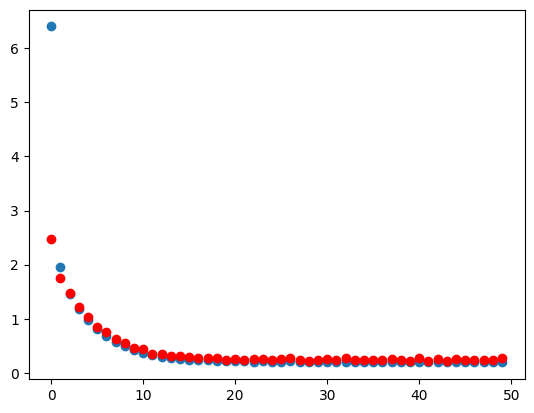

In [472]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

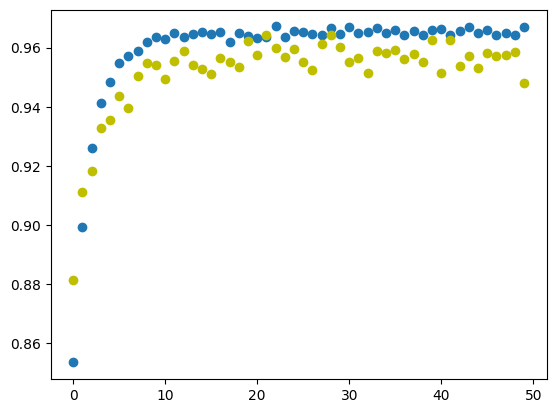

In [473]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [474]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2521417737007141
Test accuracy: 0.9491999745368958


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 34ms/step


array([[9.9994195e-01, 1.3246866e-09, 5.5768312e-05, 1.8196541e-09,
        4.0701824e-11, 4.8784417e-09, 6.4530008e-07, 4.2877174e-11,
        1.2116991e-11, 1.7269718e-06]], dtype=float32)

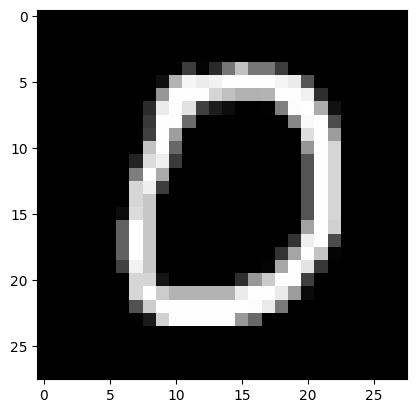

In [475]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zwiększony zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

kernel_regularizer=l2(0.01) (we wszystkich warstwach)

In [476]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 128)               100480    
                                                                 
 dense_75 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 30 epoki potem się praktycznie nie uczy, ale się nie przeucza, wykresy błędu (treningowego i walidacyjnego)są podobne przy czym błędy cały czas spadają, ale od około 30 epoki spada bardzo wolno wręcz są stałe. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie, ale po 30 epoce mniej.

# **Regularyzacja** - metoda 4

In [477]:
from keras.layers import Dropout

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


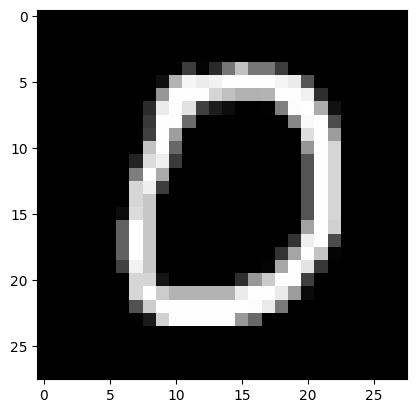

In [478]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [479]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [480]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [481]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 6.4567 - accuracy: 0.6065 - val_loss: 0.8688 - val_accuracy: 0.7918
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 1.0845 - accuracy: 0.7149 - val_loss: 0.6185 - val_accuracy: 0.8454
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.8483 - accuracy: 0.7711 - val_loss: 0.5151 - val_accuracy: 0.8840
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.7143 - accuracy: 0.8080 - val_loss: 0.4623 - val_accuracy: 0.9030
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.6186 - accuracy: 0.8295 - val_loss: 0.3950 - val_accuracy: 0.9123
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5526 - accuracy: 0.8470 - val_loss: 0.3502 - val_accuracy: 0.9195
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5092 - accuracy: 0.8597 - val_loss: 0.3465 - val_accuracy: 0.9212
Epoch 

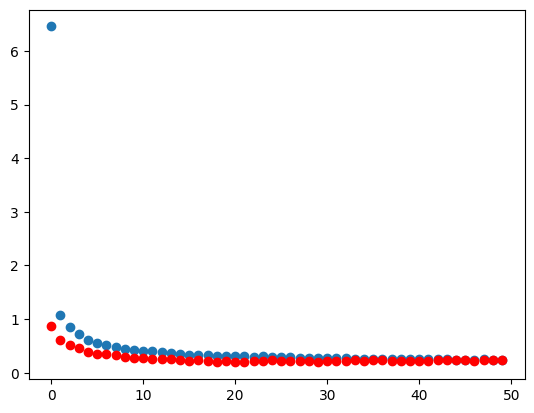

In [482]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

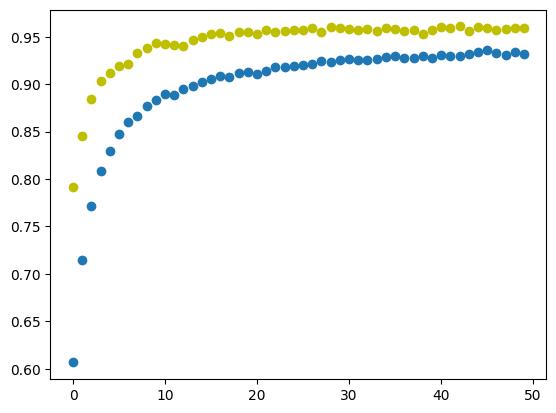

In [483]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [484]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2699497938156128
Test accuracy: 0.9580000042915344


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 37ms/step


array([[9.9996579e-01, 1.7283757e-34, 2.5498052e-06, 1.1869583e-16,
        3.2256109e-10, 3.5288206e-11, 3.0627398e-05, 8.4430391e-16,
        1.1219787e-14, 1.0727665e-06]], dtype=float32)

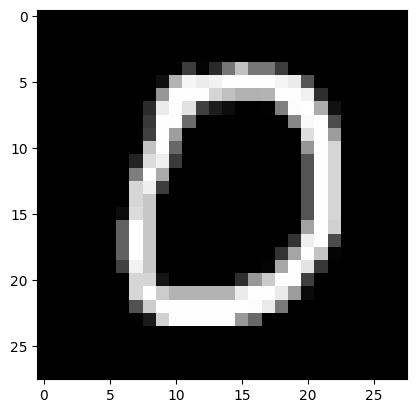

In [485]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zbiór treningowy **60000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

model.add(Dropout(0.4))

In [486]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do samego końca i się nie przeucza, wykresy błędu (treningowego i walidacyjnego)są podobne przy czym błędy cały czas spadają. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #1



Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [487]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [488]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [489]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [490]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [491]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [492]:
train_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


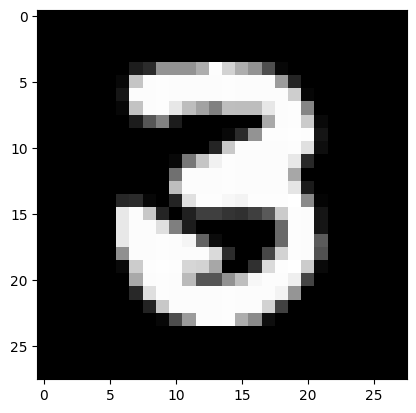

In [493]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [494]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Resizing model

In [495]:
model = Sequential()
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                50240     
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [496]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 111.9053 - accuracy: 0.2481 - val_loss: 24.1148 - val_accuracy: 0.4925
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 17.8498 - accuracy: 0.5344 - val_loss: 9.9882 - val_accuracy: 0.5425
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 6.0441 - accuracy: 0.5494 - val_loss: 6.1303 - val_accuracy: 0.4925
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 3.3029 - accuracy: 0.4975 - val_loss: 5.1426 - val_accuracy: 0.4975
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 2.7484 - accuracy: 0.4969 - val_loss: 4.6686 - val_accuracy: 0.5300
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 2.4854 - accuracy: 0.5131 - val_loss: 4.7867 - val_accuracy: 0.5275
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 2.4091 - accuracy: 0.5356 - val_loss: 4.7095 - val_accuracy: 0.5425
Epoch 8/50
13/1

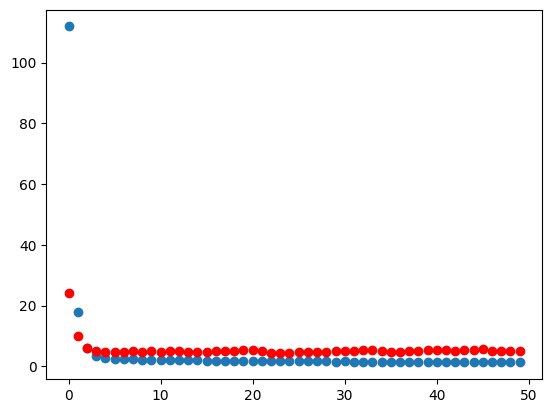

In [497]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

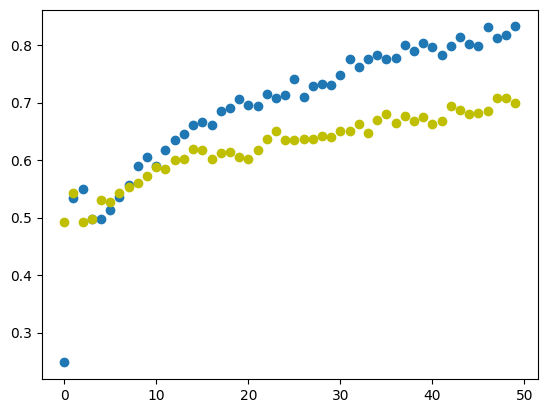

In [498]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [499]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 4.359646797180176
Test accuracy: 0.747735321521759


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 43ms/step


array([[1.13327535e-10, 2.14035153e-05, 3.56254607e-01, 2.41581634e-01,
        4.04927307e-11, 8.10949225e-03, 1.22830599e-07, 4.47372006e-09,
        3.94032657e-01, 9.93330289e-08]], dtype=float32)

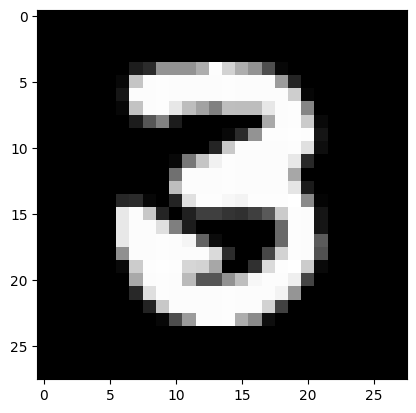

In [500]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.4))

In [501]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                50240     
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do samego końca i się nie przeucza, wykresy błędu (treningowego i walidacyjnego)są podobne przy czym błędy cały czas, ale od 5 epoki dużo wolniej. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #2




Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [502]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [503]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [504]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [505]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [506]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [507]:
train_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


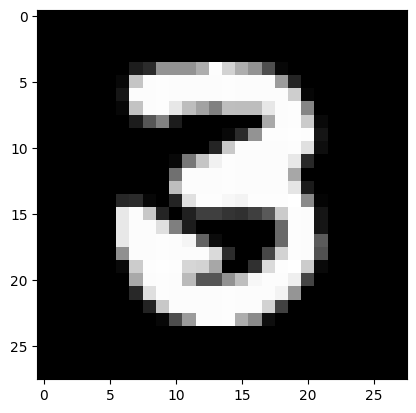

In [508]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [509]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Resizing model

In [510]:
model = Sequential()
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                50240     
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [511]:
batch_size = 128
epochs = 75

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/75
13/13 [==============================] - 1s 14ms/step - loss: 89.0396 - accuracy: 0.2663 - val_loss: 17.1481 - val_accuracy: 0.5125
Epoch 2/75
13/13 [==============================] - 0s 5ms/step - loss: 13.7555 - accuracy: 0.5050 - val_loss: 7.7062 - val_accuracy: 0.5925
Epoch 3/75
13/13 [==============================] - 0s 5ms/step - loss: 5.1072 - accuracy: 0.5337 - val_loss: 4.4299 - val_accuracy: 0.5525
Epoch 4/75
13/13 [==============================] - 0s 4ms/step - loss: 3.2164 - accuracy: 0.5031 - val_loss: 3.4946 - val_accuracy: 0.5075
Epoch 5/75
13/13 [==============================] - 0s 4ms/step - loss: 2.6741 - accuracy: 0.4969 - val_loss: 3.3859 - val_accuracy: 0.5225
Epoch 6/75
13/13 [==============================] - 0s 4ms/step - loss: 2.5385 - accuracy: 0.5088 - val_loss: 3.3389 - val_accuracy: 0.5225
Epoch 7/75
13/13 [==============================] - 0s 5ms/step - loss: 2.4223 - accuracy: 0.5350 - val_loss: 3.3102 - val_accuracy: 0.5525
Epoch 8/75
13/13

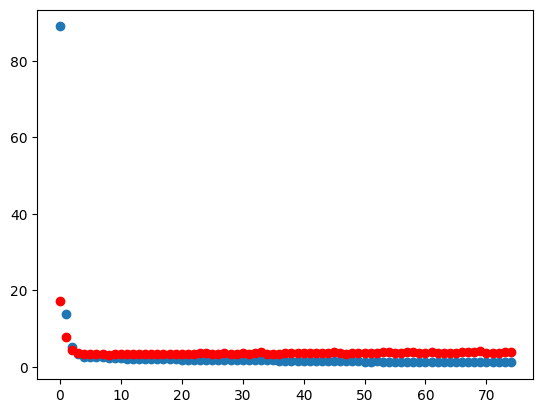

In [512]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

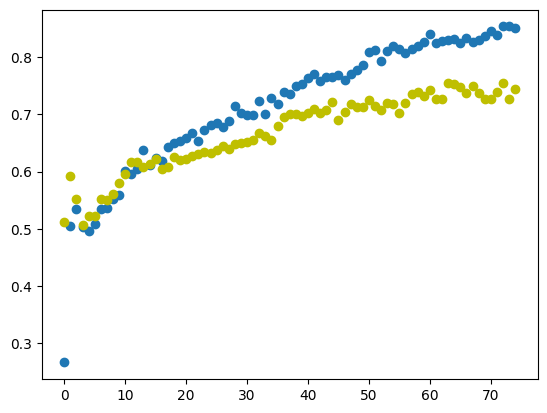

In [513]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [514]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.6267483234405518
Test accuracy: 0.7762647271156311


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 44ms/step


array([[6.36910846e-22, 9.86549845e-14, 1.69708755e-07, 9.99999762e-01,
        1.13557604e-07, 4.34623069e-18, 4.24941226e-23, 1.04775387e-17,
        4.43427519e-23, 3.87955533e-22]], dtype=float32)

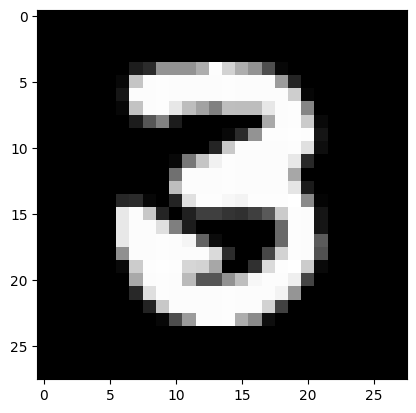

In [515]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 75

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.4))

In [516]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                50240     
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 30 epoki potem deliktanie się przeucza, wykresy błędu (treningowego i walidacyjnego) są podobne przy czym po 30 epoce błąd validacyjny rośnie dalej, a błąd treningowy spada. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #3




Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [517]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [518]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [519]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [520]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [521]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [522]:
train_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


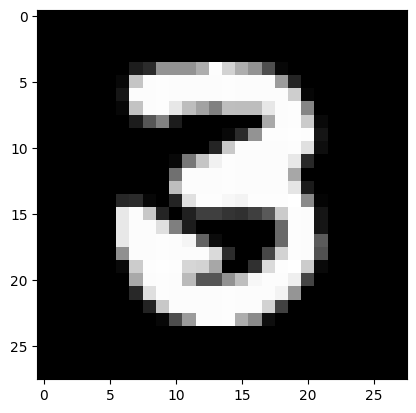

In [523]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [524]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Resizing model

In [525]:
model = Sequential()
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.002)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 64)                50240     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [526]:
batch_size = 128
epochs = 100

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 53.1018 - accuracy: 0.3981 - val_loss: 12.1903 - val_accuracy: 0.5125
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 5.1356 - accuracy: 0.5856 - val_loss: 4.1424 - val_accuracy: 0.5675
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 2.7022 - accuracy: 0.5344 - val_loss: 3.2083 - val_accuracy: 0.5325
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 2.3072 - accuracy: 0.5250 - val_loss: 3.0452 - val_accuracy: 0.5200
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 2.1849 - accuracy: 0.5650 - val_loss: 3.2034 - val_accuracy: 0.6000
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 2.0093 - accuracy: 0.6381 - val_loss: 3.2381 - val_accuracy: 0.6600
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 1.9696 - accuracy: 0.6550 - val_loss: 3.2202 - val_accuracy: 0.6375
Epoch 8/10

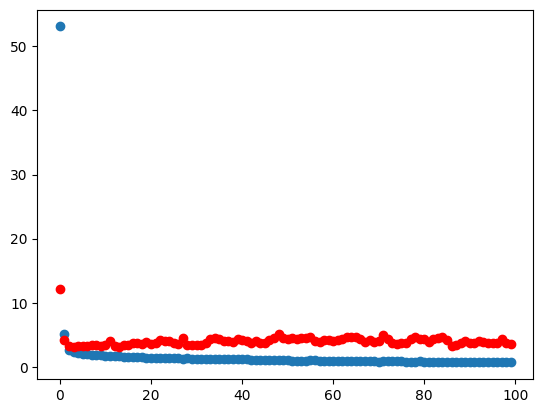

In [527]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

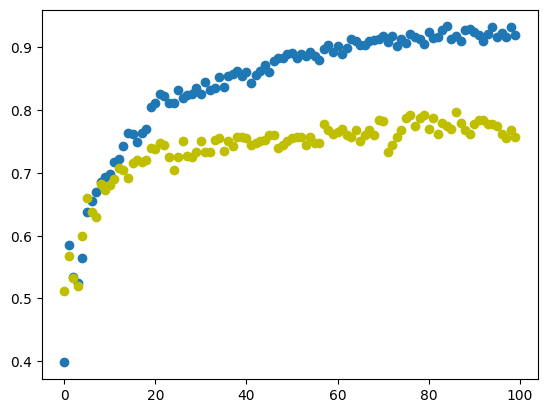

In [528]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [529]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.8622798919677734
Test accuracy: 0.8228235244750977


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 40ms/step


array([[3.0179252e-09, 2.0148222e-15, 5.3240196e-10, 1.0000000e+00,
        5.6465964e-14, 4.2878010e-08, 4.2194460e-17, 1.0682056e-20,
        2.1817123e-10, 1.0109484e-19]], dtype=float32)

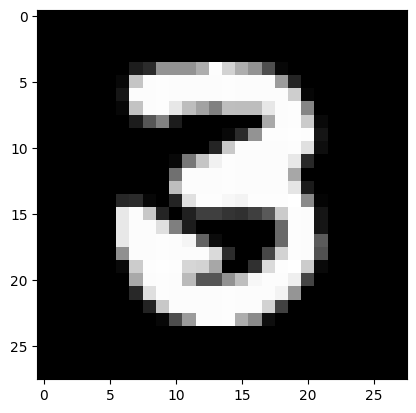

In [530]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 100

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.002)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.3))

In [531]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 64)                50240     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 4 epoki potem się przeucza, wykresy błędu (treningowego i walidacyjnego) są podobne przy czym po 5 epoce błąd validacyjny rośnie dalej, a błąd treningowy spada. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #4




Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [532]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [533]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [534]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [535]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [536]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [537]:
train_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


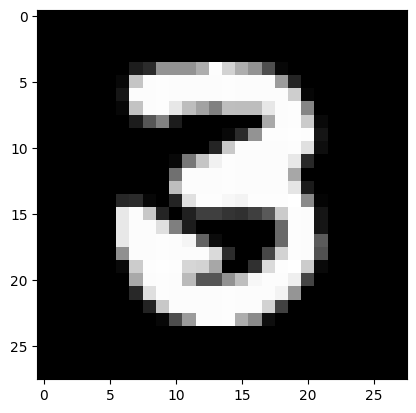

In [538]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [539]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Zmiana learning_rate

Resizing model

In [540]:
model = Sequential()
model.add(Dense(units = 128, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True,  activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.009)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 128)               100480    
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [541]:
batch_size = 1024
epochs = 150

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/150
2/2 [==============================] - 1s 245ms/step - loss: 184.7986 - accuracy: 0.1388 - val_loss: 44.7958 - val_accuracy: 0.3750
Epoch 2/150
2/2 [==============================] - 0s 41ms/step - loss: 83.8731 - accuracy: 0.3000 - val_loss: 14.0158 - val_accuracy: 0.5900
Epoch 3/150
2/2 [==============================] - 0s 45ms/step - loss: 36.4175 - accuracy: 0.4219 - val_loss: 9.9420 - val_accuracy: 0.6275
Epoch 4/150
2/2 [==============================] - 0s 45ms/step - loss: 21.4198 - accuracy: 0.4931 - val_loss: 8.4882 - val_accuracy: 0.6525
Epoch 5/150
2/2 [==============================] - 0s 58ms/step - loss: 14.1782 - accuracy: 0.5575 - val_loss: 9.2795 - val_accuracy: 0.6475
Epoch 6/150
2/2 [==============================] - 0s 41ms/step - loss: 11.2631 - accuracy: 0.6381 - val_loss: 9.2980 - val_accuracy: 0.6600
Epoch 7/150
2/2 [==============================] - 0s 41ms/step - loss: 8.6092 - accuracy: 0.6612 - val_loss: 8.2783 - val_accuracy: 0.6675
Epoch 8/15

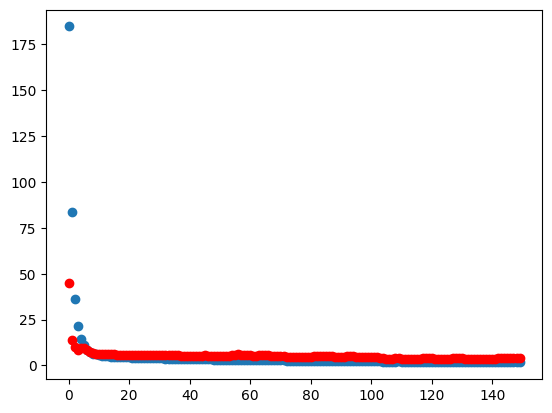

In [542]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

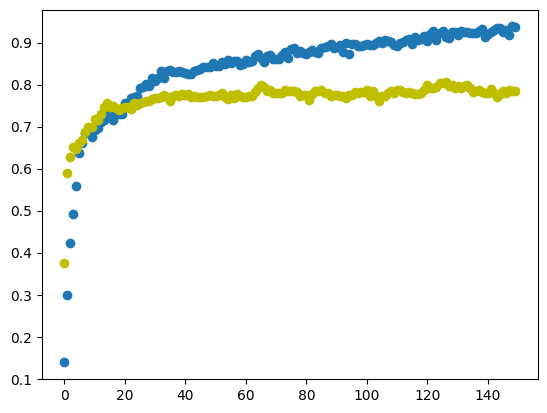

In [543]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [548]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.08088755607605
Test accuracy: 0.8336029648780823


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 51ms/step


array([[4.4935628e-06, 1.7050485e-04, 7.6165894e-04, 9.9758494e-01,
        1.2921124e-04, 7.4596825e-04, 9.6212352e-06, 1.8934191e-04,
        3.1714249e-04, 8.7051973e-05]], dtype=float32)

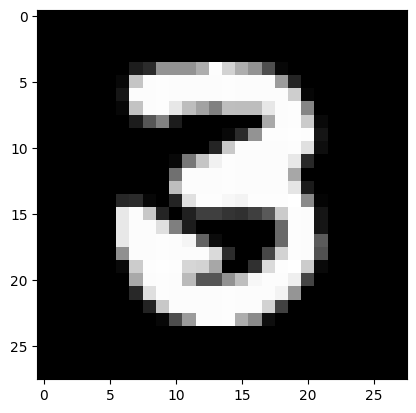

In [547]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 1024

epochs = 150

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.009)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.4))

In [549]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 128)               100480    
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się cały czas, przy czym po 20 epoce dużo wolniej, wykresy błędu (treningowego i walidacyjnego) są podobne przy czym po 20 epoce wykresy spadają wolniej. Dokładność modelu dla danych treningowych i walidacyjnych cały czas rośnie.